In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas-datareader==0.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

ALFAA = pdr.get_data_yahoo('ALFAA.MX', start="01/01/2017", interval="m")
IPC = pdr.get_data_yahoo('^MXX', start="01/01/2017", interval="m")

In [ ]:
ALFAA = ALFAA.loc[ALFAA["Adj Close"].notna()]
IPC = IPC.loc[IPC["Adj Close"].notna()]


In [ ]:
ALFAA.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-01,15.30,12.81,13.66,15.12,278403554.0,15.12
2022-06-01,15.21,13.16,15.11,14.28,188220874.0,14.28
2022-07-01,15.37,13.51,14.25,14.01,109145600.0,14.01
2022-08-01,14.35,13.63,13.98,14.25,70871529.0,14.25
2022-08-19,14.25,14.09,14.25,14.20,30536.0,14.20


In [ ]:
IPC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,48632.511719,45314.578125,45642.800781,47001.058594,3957117700,47001.058594
2017-02-01,48115.980469,46587.929688,47001.968750,46856.789062,3659561100,46856.789062
2017-03-01,49523.941406,46597.578125,46853.671875,48541.558594,4039192700,48541.558594
2017-04-01,50147.039062,48335.980469,48549.230469,49261.328125,2720546000,49261.328125
2017-05-01,50154.328125,48146.000000,49260.121094,48788.441406,3589382700,48788.441406
...,...,...,...,...,...,...
2022-05-01,52745.980469,48669.210938,51426.269531,51752.531250,5499191700,51752.531250
2022-06-01,51820.679688,46344.941406,51739.871094,47524.449219,4153468300,47524.449219
2022-07-01,48584.140625,46164.269531,47543.351562,48144.328125,2759226700,48144.328125


In [ ]:
#x = ALFAA["Adj Close"]
#y = IPC["Adj Close"]
yn = np.log(ALFAA['Adj Close']) - np.log(ALFAA['Adj Close'].shift(1))
xn = np.log(IPC['Adj Close']) - np.log(IPC['Adj Close'].shift(1))

In [ ]:
y =  yn.loc[yn.notna()]
x = xn.loc[xn.notna()]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [ ]:
X = x[:, np.newaxis]
X.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


(68, 1)

In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
model.coef_ # This is the parameter value

array([1.51766368])

In [ ]:
model.intercept_ # This is the bias value

-0.010047965722357163

In [ ]:
xfit = np.linspace(-0.3, 0.3)
xfit

array([-0.3       , -0.2877551 , -0.2755102 , -0.26326531, -0.25102041,
       -0.23877551, -0.22653061, -0.21428571, -0.20204082, -0.18979592,
       -0.17755102, -0.16530612, -0.15306122, -0.14081633, -0.12857143,
       -0.11632653, -0.10408163, -0.09183673, -0.07959184, -0.06734694,
       -0.05510204, -0.04285714, -0.03061224, -0.01836735, -0.00612245,
        0.00612245,  0.01836735,  0.03061224,  0.04285714,  0.05510204,
        0.06734694,  0.07959184,  0.09183673,  0.10408163,  0.11632653,
        0.12857143,  0.14081633,  0.15306122,  0.16530612,  0.17755102,
        0.18979592,  0.20204082,  0.21428571,  0.22653061,  0.23877551,
        0.25102041,  0.26326531,  0.2755102 ,  0.2877551 ,  0.3       ])

In [ ]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
yfit

array([-0.46534707, -0.44676343, -0.4281798 , -0.40959616, -0.39101252,
       -0.37242889, -0.35384525, -0.33526161, -0.31667797, -0.29809434,
       -0.2795107 , -0.26092706, -0.24234343, -0.22375979, -0.20517615,
       -0.18659252, -0.16800888, -0.14942524, -0.13084161, -0.11225797,
       -0.09367433, -0.07509069, -0.05650706, -0.03792342, -0.01933978,
       -0.00075615,  0.01782749,  0.03641113,  0.05499476,  0.0735784 ,
        0.09216204,  0.11074567,  0.12932931,  0.14791295,  0.16649658,
        0.18508022,  0.20366386,  0.2222475 ,  0.24083113,  0.25941477,
        0.27799841,  0.29658204,  0.31516568,  0.33374932,  0.35233295,
        0.37091659,  0.38950023,  0.40808386,  0.4266675 ,  0.44525114])

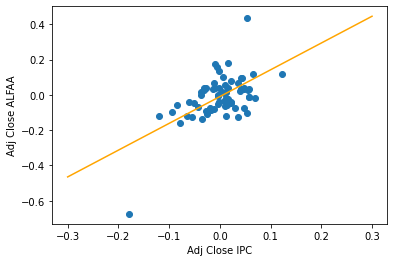

In [ ]:
plt.scatter(x, y)
plt.xlabel("Adj Close IPC")
plt.ylabel("Adj Close ALFAA")
plt.plot(xfit, yfit, color="orange");
plt.show()

FUNCION
y = 1.51766368x - 0.010047965722357163

In [ ]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import statsmodels.formula.api as smf
sprices = pdr.get_data_yahoo(['ALFAA.MX','^MXX'],start="01/01/2018", end="07/31/2022",interval="m")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
sr=sr.dropna()
sr.columns=['ALFAA','MXX']
mkmodel2 = smf.ols('ALFAA ~ MXX',data=sr).fit()
 
print(mkmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.13
Date:                Fri, 19 Aug 2022   Prob (F-statistic):           2.36e-06
Time:                        15:05:45   Log-Likelihood:                 42.633
No. Observations:                  54   AIC:                            -81.27
Df Residuals:                      52   BIC:                            -77.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0080      0.015     -0.522      0.6

TANTO T VALUE COMO EL P VALUE NOS DICE QUE LA ACERTIVIDAD ES MUY POCA